In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
# Load your dataset 
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Bagging using Random Forest
n_estimators = 1000  # Number of trees in the forest
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=41)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
# Print results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


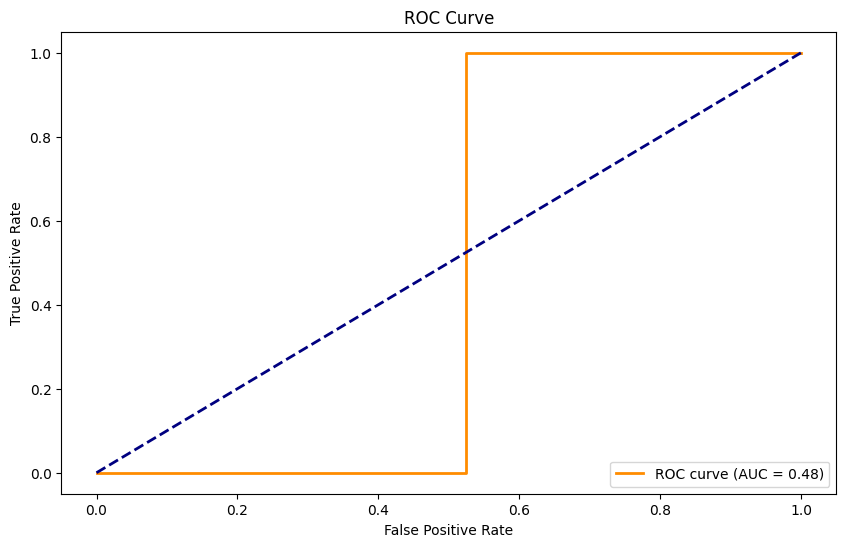

In [14]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

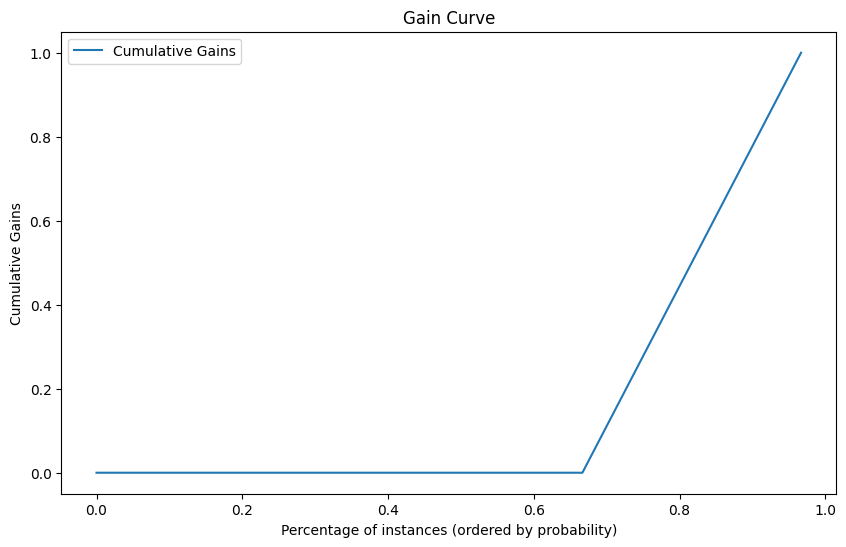

In [6]:
# Gain curve and Lift curve 
# Get class probabilities
y_prob = rf_classifier.predict_proba(X_test)

# Sort instances by predicted probabilities
sorted_indices = np.argsort(y_prob[:, 1])

# Calculate cumulative gains
cumulative_gains = np.cumsum(y_test[sorted_indices] == 1) / np.sum(y_test == 1)

# Calculate lift
lift = cumulative_gains / (np.arange(len(y_test)) + 1 / len(y_test))

# Plot Gain curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)) / len(y_test), cumulative_gains, label='Cumulative Gains')
plt.xlabel('Percentage of instances (ordered by probability)')
plt.ylabel('Cumulative Gains')
plt.title('Gain Curve')
plt.legend()
plt.show()

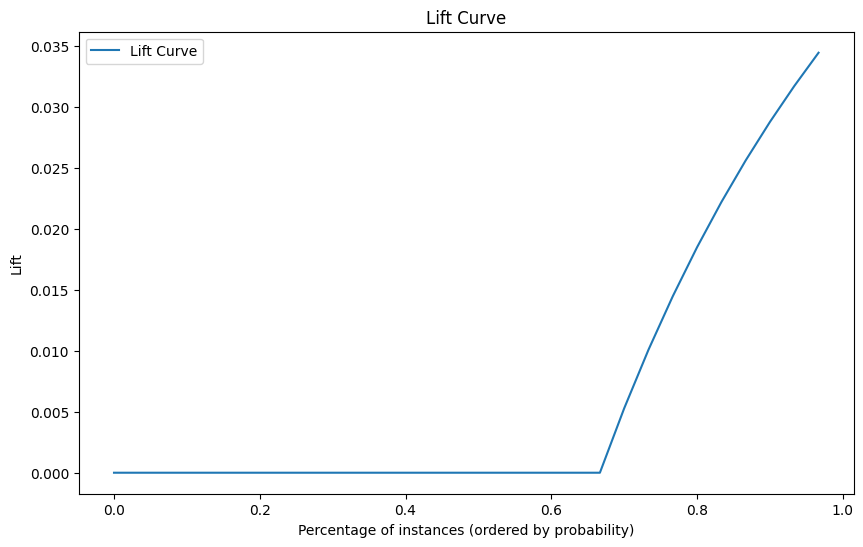

In [7]:

# Plot Lift curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)) / len(y_test), lift, label='Lift Curve')
plt.xlabel('Percentage of instances (ordered by probability)')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.show()
